<a href="https://colab.research.google.com/github/Anbarasu008/Batch-2/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

# Display the first few rows
print(df.head())


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [9]:
import re
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'tweet': ['Check out this link http://example.com #Python @user', 'Another tweet!']})

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    return text.lower()

# Apply cleaning function
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

# Display the cleaned DataFrame
print(df.head())


                                               tweet           cleaned_tweet
0  Check out this link http://example.com #Python...  check out this link   
1                                     Another tweet!           another tweet


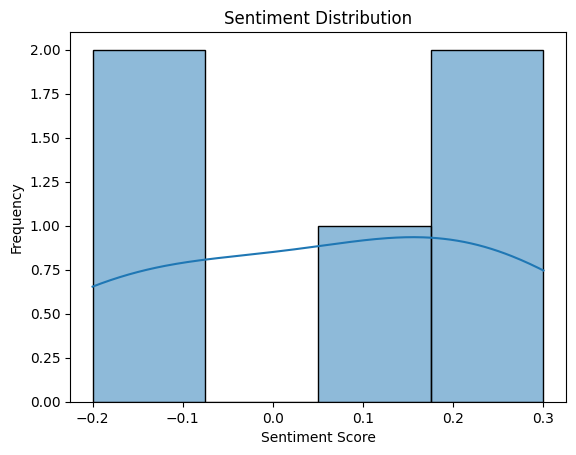

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({'sentiment': [0.1, -0.2, 0.3, -0.1, 0.2]})

# Plot sentiment distribution
sns.histplot(df['sentiment'], kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame
df = pd.DataFrame({'cleaned_tweet': ['I love Python', 'Python is great', 'I hate bugs']})

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned tweets
X = vectorizer.fit_transform(df['cleaned_tweet']).toarray()

# Display the shape of the feature matrix
print(X.shape)


(3, 6)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Sample DataFrame
df = pd.DataFrame({'cleaned_tweet': ['I love Python', 'Python is great', 'I hate bugs'],
                   'sentiment': [1, 1, 0]})

# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_tweet']).toarray()
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Sample true and predicted labels
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 0]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
Confusion Matrix:
[[2 0]
 [1 2]]
